In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Uploading experience-salary dataset
exp_sal_data = pd.read_csv("Datasets\Experience-salary.csv")
exp_sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
exp_sal_data.head(10)

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
5,31.671171,32.966251
6,14.186399,15.294170
7,29.932845,33.159461
8,32.841327,32.032653
9,26.873869,32.347784


In [7]:
exp_sal_data.isnull().any()  #checking missing values

exp(in months)          False
salary(in thousands)    False
dtype: bool

In [12]:
#Dividing dataset by two groups: values of input variable x and values of target variable y
x_data, y_data = exp_sal_data['exp(in months)'], exp_sal_data['salary(in thousands)']

#Splitting data into train and test samples
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.33, random_state = 42)
print(f'X train data: \n{x_train.head()}')
print(f'X test data:  \n{x_test.head()}')
print(f'Y train data: \n{y_train.head()}')
print(f'Y test data:  \n{x_test.head()}')


X train data: 
703    29.209424
311    20.023587
722    35.373873
629    36.433411
0      18.290293
Name: exp(in months), dtype: float64
X test data:  
521    36.878305
737    18.422093
740    45.011941
660    33.782173
411    15.909033
Name: exp(in months), dtype: float64
Y train data: 
703    37.501077
311    12.012883
722    35.924525
629    40.311947
0      16.521825
Name: salary(in thousands), dtype: float64
Y test data:  
521    36.878305
737    18.422093
740    45.011941
660    33.782173
411    15.909033
Name: exp(in months), dtype: float64


In [28]:
print(np.shape(x_train), np.shape(x_test))

(670,) (330,)


In [15]:
#Creating and training model
lin_model = LinearRegression(fit_intercept = True)
lin_model.fit(np.array(x_train).reshape(-1, 1), y_train)
print(f"Slope coef: {lin_model.coef_[0]}, Intercept coef: {lin_model.intercept_}")

Slope coef: 0.8375500720657327, Intercept coef: 4.678492625020063


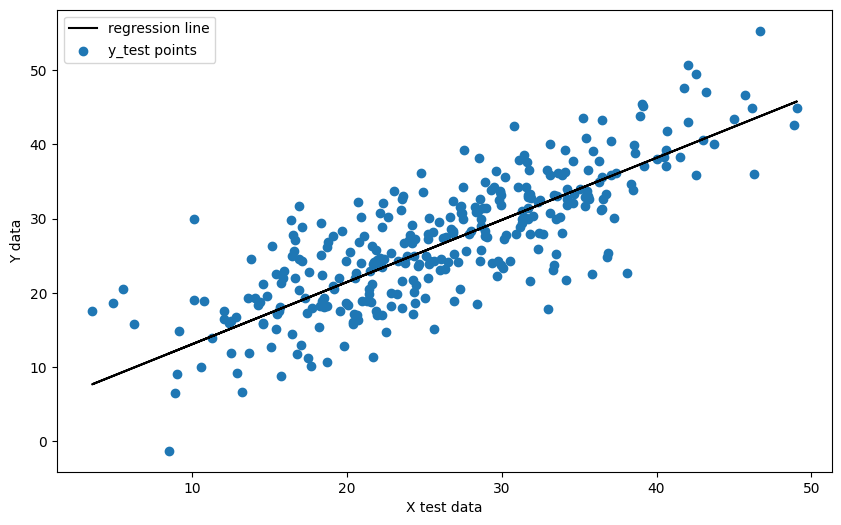

In [18]:
#Predicting values of the target variable by x_test inputs and building graphs 
y_pred = lin_model.predict(np.array(x_test).reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_pred, color = "black")
plt.scatter(x_test, y_test)
plt.xlabel("X test data")
plt.ylabel("Y data")
plt.legend(['regression line', 'y_test points'])

In [23]:
#Comparison of y test values and y predicted values
comp_dataframe = pd.DataFrame({'y_test': y_test, 'y_predicted': y_pred})
comp_dataframe.head(12)

,y_test,y_predicted
521,25.323189,35.565919
737,22.371466,20.107918
740,43.355878,42.378247
660,30.249273,32.972754
411,22.018970,18.003104
678,17.981307,24.430381
626,24.227325,25.946501
513,27.071879,24.810249
859,42.641924,45.594651
136,27.837351,24.846641


In [26]:
#Variances by columns
comp_dataframe.var()

y_test         75.840578
y_predicted    53.850542
dtype: float64

In [35]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}, Determination coeff: {r2_score(y_test, y_pred)}')

MSE: 27.774667610227983, Determination coeff: 0.6326624918241435
